
# Linear Regression Example
The example below uses a [marketing](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset,
in order to illustrate a linear regression activity.

Workflow:



1. Preparation
    1. Load the dataset from a `.csv` file and show a short description
    1. set the `random_state` variable to make the experiment *repeatable*
    1. Inspect and eliminate rows with nulls
    1. Use the background information provided by the data owners
        1. create new derived columns 
        1. drop the column declared by the experts as non interesting
        1. set the target and split the data into *predicting variables* `X` and *target* `y`
    1. Data exploration
        1. Show the two dimensional scatter plots for all the predicting variables with respect to the target
        1. Show the *p-values* of the target with respect to the variables (it is the probability that a variable has zero coefficient in a linear regression)
1. First experiment: compute the regression on a single predicting variable
    1. Consider a reduced dataset containing the chosen variable and the target
    1. Fit the `LinearRegression` estimator on the training set
    1. Show the statistical significance of the fitted model
    1. Predict the target for the test set using the *fitted* estimator
    1. Compute the regression coefficients and the quality measures: *Root Mean Squared Error (RMSE)* and *coefficient of determination (r2)*
1. Second experiment: compute the regression considering all the predicting variables
    1. Repeat the steps from 2.2 to 2.5
1. Third experiment: use the `DecisionTreeRegressor` with the entire dataset
    1. Fit the tree using the default hyperparameters, in order to find the 
    maximum depth of the unconstrained tree
    1. Use *cross-validation* to find the optimal *maximum depth* of the tree
    1. Fit the tree with the optmal `max_depth`
    1. Predict and show the *root mean squared error*
1. Fourth experiment: use the `RandomForestRegressor`
    1. Repeat steps from 4.2 to 4.4 (for simplicity, we use the maximum `max_depth` found in 4.1)


In [1]:
# Code source: Claudio Sartori 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

## Load the dataset from a `.xlsx` file and show a short description

In [2]:
# This cell allows full compatibility between execution in Google Colab and in local
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

In [3]:
# The file must be available in the same directory, 
# or uploaded in the Colab environment 
# in the execution of the previous cell
data_fn = 'FoodUK2014.xlsx'
# to fill

##### Show a short description of the columns

In [4]:
# to fill

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114,5114.000000,5114.000000,5114.000000,5114,5114,5114,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
unique,NaN,4,NaN,NaN,NaN,2,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,April to June,NaN,NaN,NaN,Male,February,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1341,NaN,NaN,NaN,3050,445,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.363707,NaN,1.841807,0.521901,519.898868,NaN,NaN,NaN,2014.0,679.542002,53.802698,10.475023,2.146960,25.727801,68.108342,19.635469,58.943391,7.072523,9.934257,2.508315
std,1.244704,NaN,0.743052,0.945622,411.543093,NaN,NaN,NaN,0.0,499.596175,16.187912,8.798118,2.034353,18.371345,57.347230,18.725096,44.751694,2.931651,5.485175,1.358023
min,1.000000,NaN,0.000000,0.000000,-246.916821,NaN,NaN,NaN,2014.0,0.000000,17.000000,0.086667,0.108333,0.060667,0.195000,0.000000,0.520000,0.357694,0.000000,0.159672
25%,1.000000,NaN,1.000000,0.000000,260.598783,NaN,NaN,NaN,2014.0,306.954000,41.000000,4.452500,0.866667,12.222167,29.141668,6.917083,27.148333,5.171614,5.979375,1.760525
50%,2.000000,NaN,2.000000,0.000000,426.977227,NaN,NaN,NaN,2014.0,548.086000,54.000000,8.374167,1.625000,22.245817,54.708336,13.736667,49.356667,6.575851,8.804690,2.254208
75%,3.000000,NaN,2.000000,1.000000,651.003763,NaN,NaN,NaN,2014.0,925.652500,67.000000,14.005333,2.816667,35.037167,90.480003,26.000000,78.281662,8.295746,12.520942,2.893561


##### Show the number of rows with nulls

It is computed subtracting the number of rows in the dataset without nulls from the original number of rows

In [5]:
# to fill

1668

#### Drop rows with nulls

In [6]:
# to fill

After dropping rows with nulls the dataset has 3446 rows


##### Data transformation
- Convert the alphanumeric SexHRP into numeric 0 and 1
    - the `sklearn` machine learning procedures work only with numeric predicting attributes
    - this can be done, for example with the `map` function of pandas series
- Generate two new columns as ratio of other columns
    - 'qmeat_hhsize_ratio' = 'qmeat'/'hhsize'
    - 'income_hhsize_ratio' = 'income'/'hhsize'
    - this is suggested by background information

In [7]:
# to fill

##### Use only the columns that the experts consider interesting
['adults_n', 'children_n', 'SexHRP', 'AgeHRP', 'qmeat_hhsize_ratio', 'income_hhsize_ratio', 'uvmeat']

This is suggested by background information

In [9]:
# to fill

,adults_n,children_n,SexHRP,AgeHRP,qmeat_hhsize_ratio,income_hhsize_ratio,uvmeat
1,2,2,1,38,1.511250,206.130000,8.813621
2,2,0,1,54,5.890083,135.962500,7.965790
4,3,0,1,64,4.285667,165.346667,5.726323
5,2,2,1,70,8.968250,66.632500,8.451528
7,3,0,1,64,4.079111,134.393333,5.904745


#### Choose the target and split the data into *predicting variables* `X` and *target* `y`

In [10]:
target = 'qmeat_hhsize_ratio'
# to fill

## Show the two dimensional scatter plots for all the predicting variables with respect to the target
Don't worry if your display is slightly different

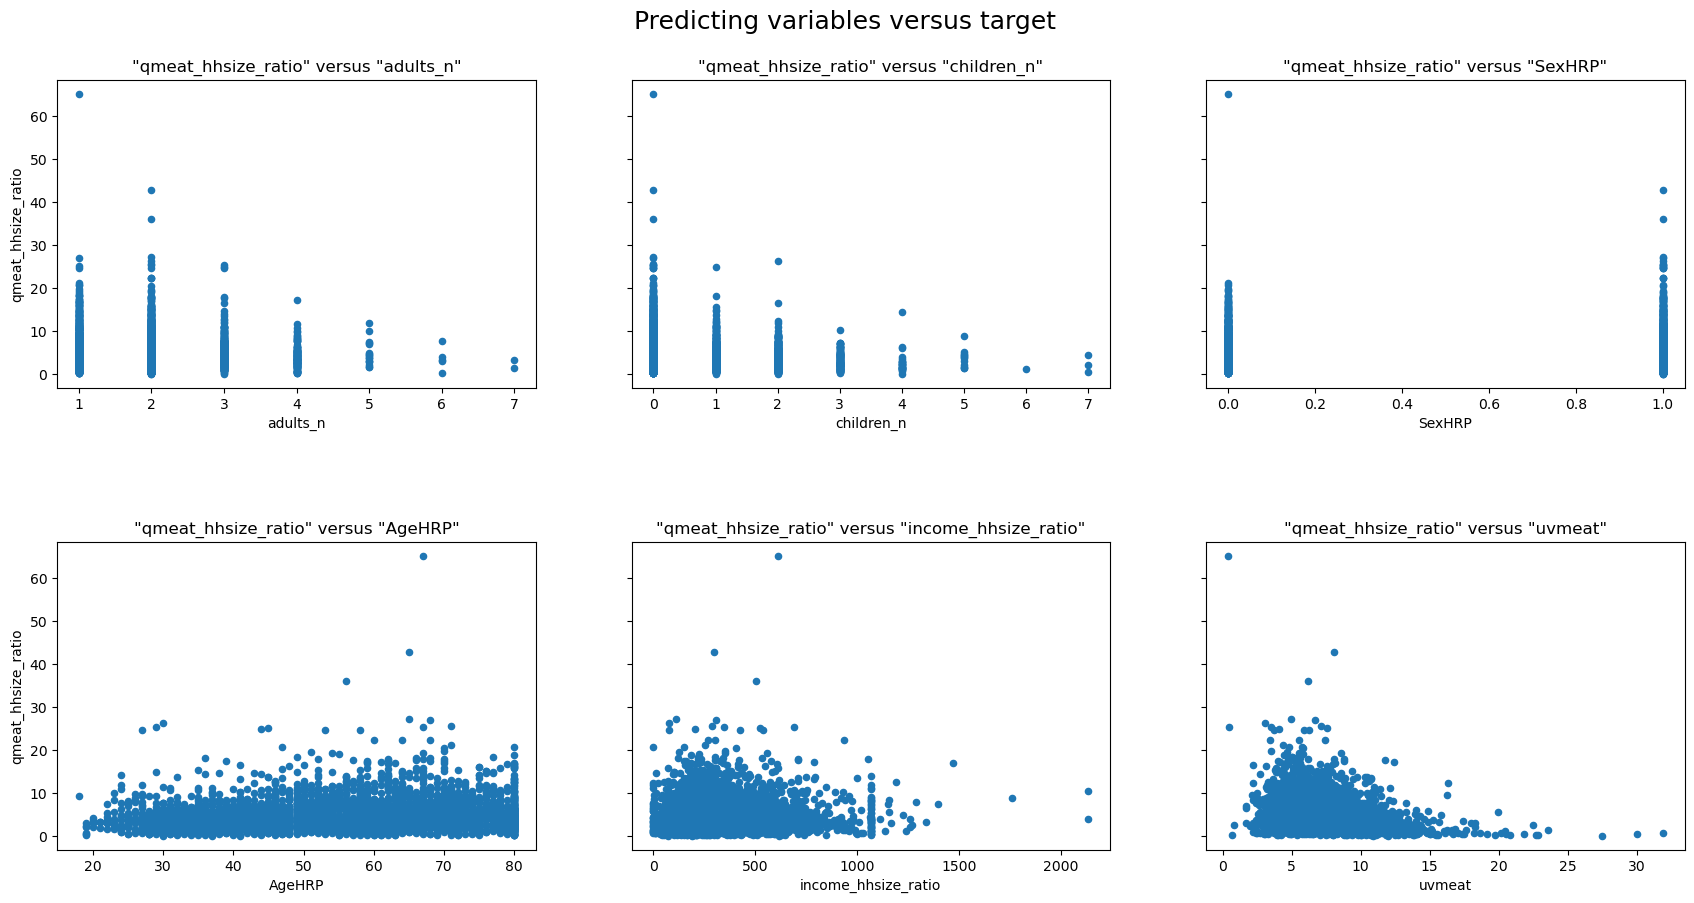

In [12]:
# to fill

### Show the *_p-values_* of the target with respect to the variables
you can use the `f_regression` function of Scikit Learn, that returns coefficients and p-values

In [13]:
# to fill

,Variable,p-value
0,adults_n,1.415945e-05
1,children_n,1.077386e-30
2,SexHRP,8.429827e-02
3,AgeHRP,1.710126e-21
4,income_hhsize_ratio,1.211099e-03
5,uvmeat,4.789746e-52


array([ 18.90194414, 135.25964933,   2.981742  ,  91.87247553,
        10.49080033, 238.35533077])

## Split the data into *train* and *test* and show the sizes of the two parts
Here we set the `random_state` variable to make the experiment *repeatable*


In [15]:
# to fill

Training set and test set have 2412 and 1034 elements respectively


### Consider a reduced dataset containing the chosen variable and the target

## First experiment: Univariate regression

### Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [18]:
# Create linear regression object
# to fill

# Train the model using the training set
# to fill

# Make predictions using the test set
# to fill


#### Compute the regression coefficients and the quality measures
- use the attributes `coef_[0]`  and `intercept_` of the fitted model
- use functions `mean_squared_error` and `r2_score`

In [ ]:
# The coefficient
# to fill

# The root mean squared error
# to fill

# Coefficient of determination = 1 is perfect prediction
# to fill


#### Prepare a `result_summary`
Create a dataframe `result_summmary` with columns `model`, `rmse` and `r2` and store at the end a row with the results for `Univariate Linear`

In [20]:
# to fill

## Second experiment: compute the regression considering all the predicting variables

### Now we use the entire data in `X_train` and `X_test` for fitting and predicting

In [21]:
# Create linear regression object
# to fill

# Train the model using the training set
# to fill

# Make predictions using the test set
# to fill


### Fit, predict and show the results
Now we see the *regression coefficients* resulting from the fitting. 

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [22]:
# Show the coefficients of the predicting variables
# to fill


,Variable,Coefficient
0,adults_n,-0.318682
1,children_n,-0.650924
2,SexHRP,0.383162
3,AgeHRP,0.014913
4,income_hhsize_ratio,0.000989
5,uvmeat,-0.392620


#### Compute the quality measures
use functions `mean_squared_error` and `r2_score` and store them in the DataFrame `result_summmary` and store the results for `Multivariate Linear` at the end of the `results_summary`

In [23]:
# The mean squared error
# to fill

# Coefficient of determination=1 is perfect prediction
# to fill

# update result_summary and show
# to fill


,Model,rmse,r2
0,Univariate Linear,3.886323,0.007595
1,Multivariate Linear,3.665149,0.117338


## Decision Tree Multivariate Regresson

In [24]:
# Create Decision Tree regression object
from sklearn.tree import DecisionTreeRegressor

#### Fit the tree with default hyperparameters, and find the maximum depth of the unconstrained tree

In [25]:
# to fill

print("The maximum depth of the full Decision Tree Regressor is {}".format(max_max_depth))

The maximum depth of the full Decision Tree Regressor is 34


#### Find the optimal value of the hyperparameter `max_depth` with *cross-validation*
The optimization searches for the *maximum tree depth* guaranteing the smallest mean squared error
At the end, this operation returns also the *fitted best tree* `best_estimator_`

In [26]:
# to fill

The optimal maximum depth for the decision tree is 2


#### Compute rmse and append to result summary
For the decision tree regressor the `r2_score` is not significant

In [27]:
# Make predictions using the test set
# to fill

# update and show the result_summary
# to fill

,Model,rmse,r2
0,Univariate Linear,3.886323,0.007595
1,Multivariate Linear,3.665149,0.117338
2,Decision Tree Regression,3.790020,NaN


#### Show the tree

use `plot_tree`

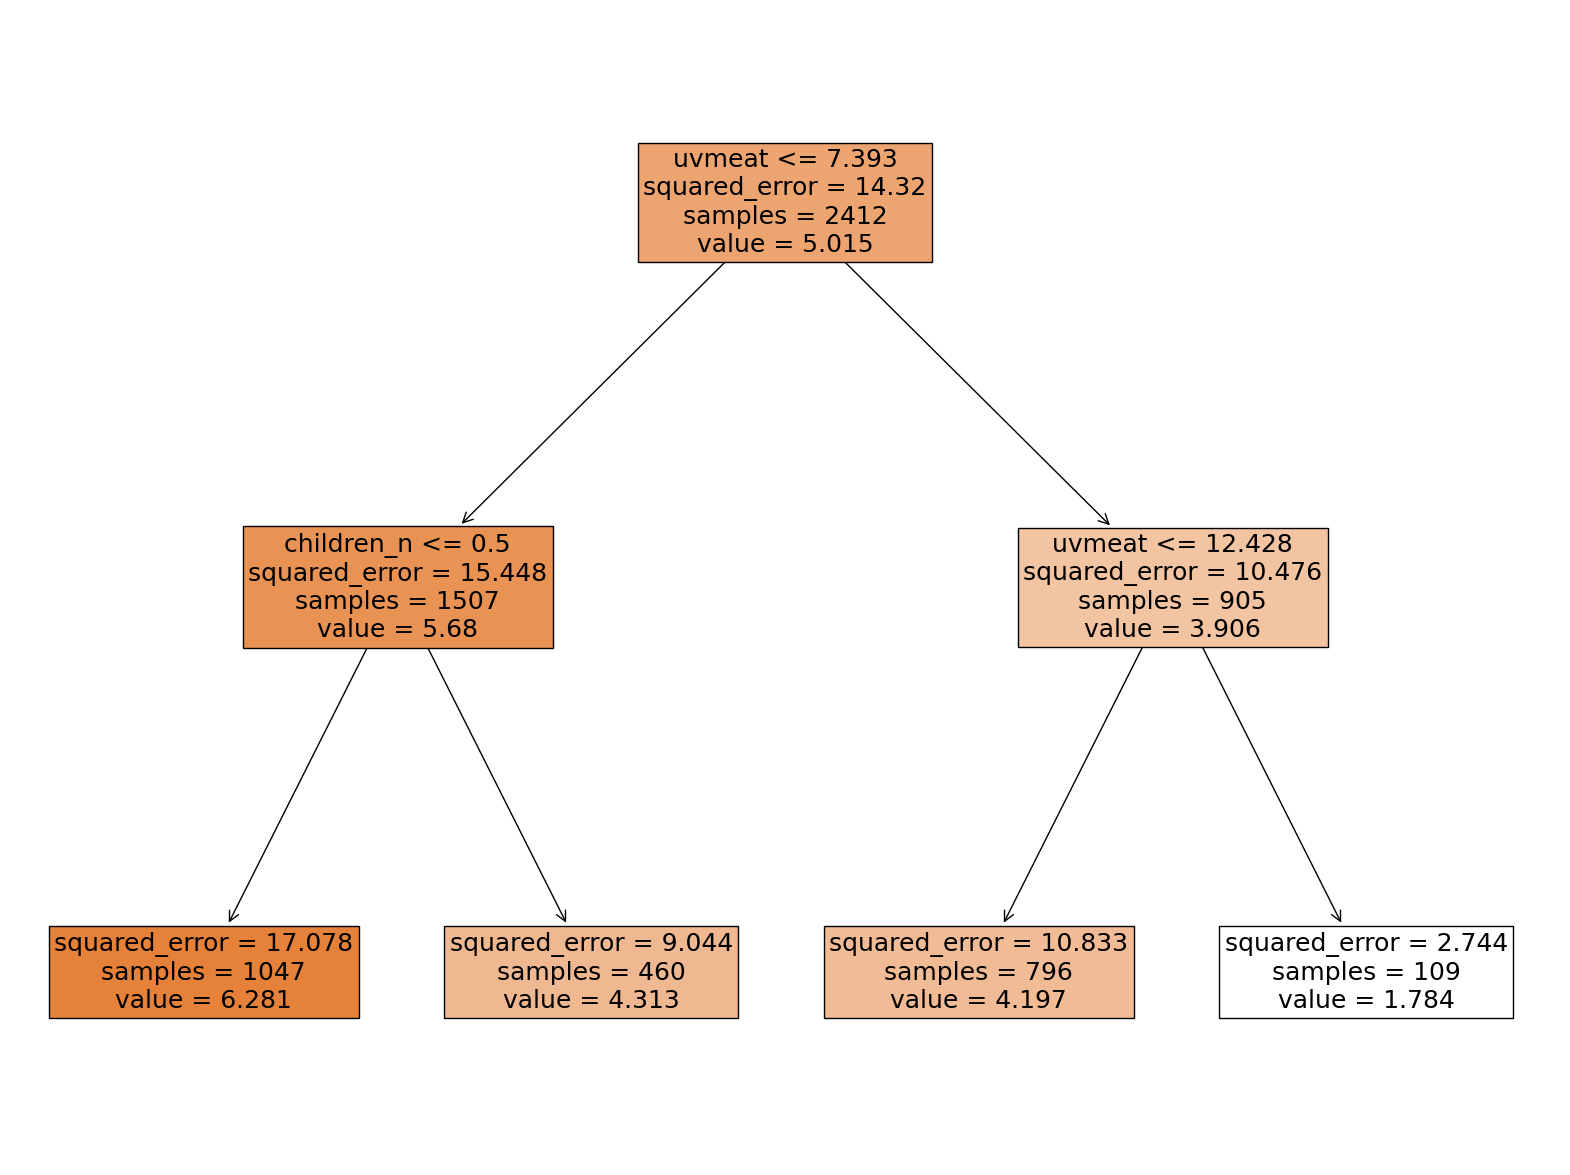

In [28]:
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
# to fill

## Random Forest Multivariate Regresson

In [29]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor
# to fill

# for simplicity, we use as a maximum maximum depth of the tree the value found in
# the unconstrained decision tree fitting
param_grid_rf = {'max_depth': list(range(1,max_max_depth))
}
# create the grid search with cross validation
# look for minimum mean square error
# to fill

# Train the model using the training set
# to fill

# the grid search returns the best estimator, store it in a variable for later use
# to fill

In [30]:
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 4


In [31]:
# predict, compute measures, store in result_summary and show
# to fill

,Model,rmse,r2
0,Univariate Linear,3.886323,0.007595
1,Multivariate Linear,3.665149,0.117338
2,Decision Tree Regression,3.790020,NaN
3,Random Forest Regression,3.577735,NaN


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models
### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression


## Control questions
1. observing the multi-variate experiment, what variable has the higher effect on the target?
1. is there a variable having an almost negligible effect on the target?
1. try to repeat the univariate experiment with one of the other columns at a time and comment the results